In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec
import datetime
import seaborn as sns
import os
import tqdm
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")

Text(0.02, 0.5, 'Daily Mean Snow Depth (m)')

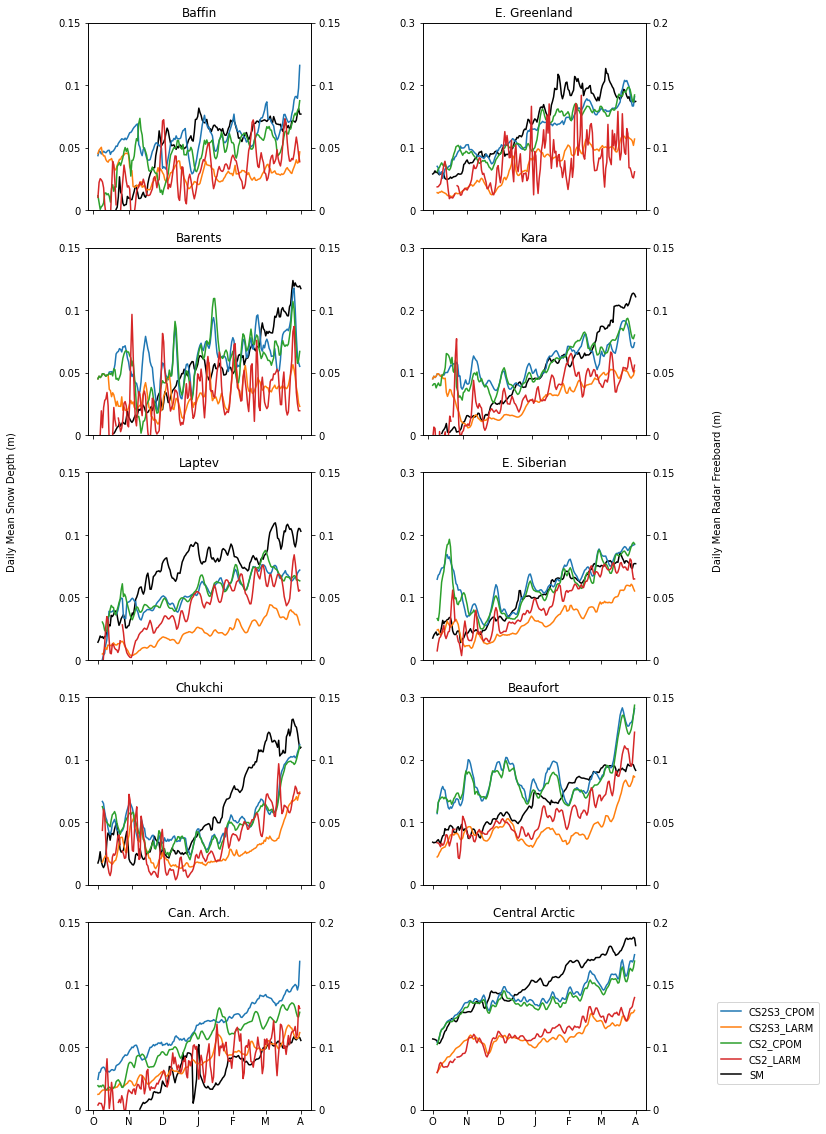

In [2]:
from matplotlib.ticker import MaxNLocator
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_regional_dailymeans.csv',header=[0,1,2])
regions = ['Baffin','Greenland','Barents','Kara','Laptev','Sib','Chuk','Bea','Can','Cen']
season = '2019-2020'
region_names = ['Baffin', 'E. Greenland','Barents','Kara','Laptev','E. Siberian','Chukchi','Beaufort','Can. Arch.','Central Arctic']

days = np.arange(0,184)
dates = [datetime.date(2019,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

# 1 Oct - 30 April
season_days = np.arange(3560,3744) # 2019-2020
counters = [0,1,2,3,4,5,6,7,8,9]

SMs = ['Unnamed: 41_level_2','Unnamed: 42_level_2','Unnamed: 43_level_2','Unnamed: 44_level_2',
       'Unnamed: 45_level_2','Unnamed: 46_level_2','Unnamed: 47_level_2','Unnamed: 48_level_2',
      'Unnamed: 49_level_2','Unnamed: 50_level_2']
CS2_CPOMs = ['Unnamed: 21_level_2','Unnamed: 22_level_2','Unnamed: 23_level_2','Unnamed: 24_level_2',
       'Unnamed: 25_level_2','Unnamed: 26_level_2','Unnamed: 27_level_2','Unnamed: 28_level_2',
      'Unnamed: 29_level_2','Unnamed: 30_level_2']
CS2_LARMs = ['Unnamed: 11_level_2','Unnamed: 12_level_2','Unnamed: 13_level_2','Unnamed: 14_level_2',
       'Unnamed: 15_level_2','Unnamed: 16_level_2','Unnamed: 17_level_2','Unnamed: 18_level_2',
      'Unnamed: 19_level_2','Unnamed: 20_level_2']
CS2S3_CPOMs = ['Unnamed: 1_level_2','Unnamed: 2_level_2','Unnamed: 3_level_2','Unnamed: 4_level_2',
       'Unnamed: 5_level_2','Unnamed: 6_level_2','Unnamed: 7_level_2','Unnamed: 8_level_2',
      'Unnamed: 9_level_2','Unnamed: 10_level_2']
CS2S3_LARMs = ['Unnamed: 31_level_2','Unnamed: 32_level_2','Unnamed: 33_level_2','Unnamed: 34_level_2',
       'Unnamed: 35_level_2','Unnamed: 36_level_2','Unnamed: 37_level_2','Unnamed: 38_level_2',
      'Unnamed: 39_level_2','Unnamed: 40_level_2']

fig = plt.figure(figsize=(10,20))
spec = gridspec.GridSpec(ncols=2, nrows=5, wspace=0.5)

for region, name, count, a, b, c, d, e in zip(regions,region_names,counters,SMs,CS2_CPOMs,CS2_LARMs,CS2S3_CPOMs,CS2S3_LARMs):
    ax = fig.add_subplot(spec[count])
    ax.plot(dates,df['SM'][region][a][season_days],color='k')
    ax.yaxis.set_major_locator(MaxNLocator(3))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if count in [1,3,5,7,9]:
        ax.set_ylim([0,0.3])
        ax.set_yticklabels([0,0.10,0.20,0.30])
    else:
        ax.set_ylim([0,0.15])
        ax.set_yticklabels([0,0.05,0.10,0.15])
    ax1 = ax.twinx()
    ax1.plot(dates,df['CS2_S3_GPOD'][region][d][season_days],label='CS2S3_CPOM')    
    ax1.plot(dates,df['CS2_S3_Bristol'][region][e][season_days],label='CS2S3_LARM')  
    ax1.plot(dates,df['CS2_CPOM'][region][b][season_days],label='CS2_CPOM')  
    ax1.plot(dates,df['CS2_Bristol'][region][c][season_days],label='CS2_LARM')  
    ax1.plot([dates[40]],[0],color='k',label='SM')

    if count < 8:
        ax1.set_xticklabels([])
    else:
        ax1.set_xticklabels(['O','N','D','J','F','M','A'])
    ax1.yaxis.set_major_locator(MaxNLocator(3))
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    if count in [1,8,9]:
        ax1.set_ylim([0,0.24])
        ax1.set_yticklabels([0,0.10,0.15,0.20])
    else:
        ax1.set_ylim([0,0.15])
        ax1.set_yticklabels([0,0.05,0.10,0.15])
    ax1.set_title(name)

ax1.legend(bbox_to_anchor = (1.8, 0.6))

fig.text(1, 0.5, 'Daily Mean Radar Freeboard (m)', ha='center', rotation='vertical')
fig.text(0.02, 0.5, 'Daily Mean Snow Depth (m)', ha='center', rotation='vertical')

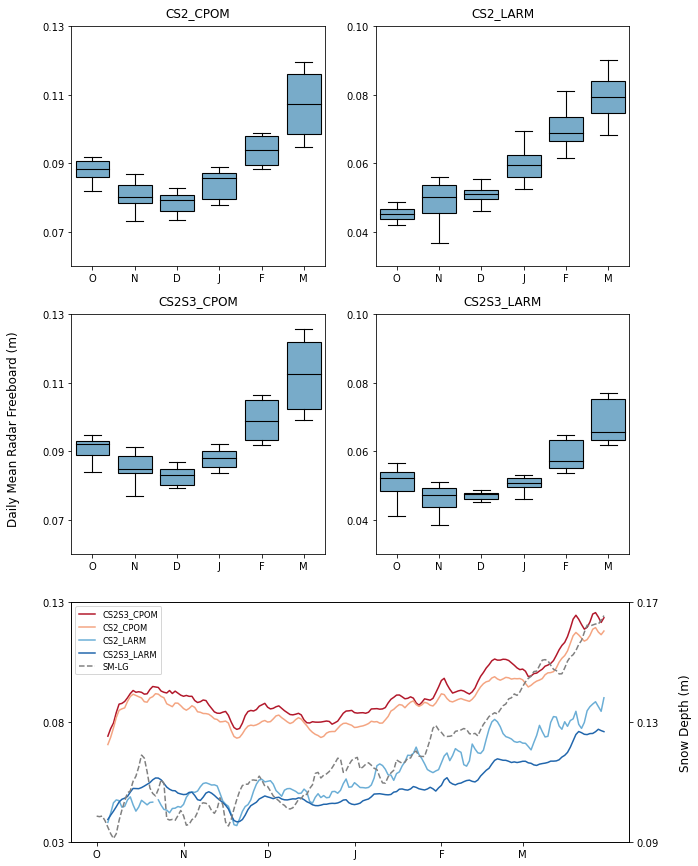

In [164]:
import seaborn as sns
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_dailymeans.csv',header=[0])
sats = ['CS2_CPOM','CS2_Bristol','CS2_S3_GPOD','CS2_S3_Bristol']
names = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM']
      
fig = plt.figure(figsize=(10,15))
spec = gridspec.GridSpec(ncols=2, nrows=3, wspace=0.2)
        
for count in np.arange(0,5):
    if count < 4:
        ax = fig.add_subplot(spec[count])
        ax.set_title(names[count],pad=10)

        sns.boxplot(data=[df[sats[count]][3560:3590], # Oct
                          df[sats[count]][3591:3620], # Nov
                          df[sats[count]][3621:3651], # Dec
                          df[sats[count]][3652:3682], # Jan
                          df[sats[count]][3683:3711], # Feb
                          df[sats[count]][3712:3742]  # Mar
                         ],showfliers = False, color='#6baed6',linewidth=1.1,
                    boxprops=dict(edgecolor="black", linewidth=1.1),
                    medianprops=dict(color="black", linewidth=1.1),
                    whiskerprops = dict(color='black', linewidth=1.1),
                    capprops = dict(color='black', linewidth=1.1))
        ax.set_xticklabels(['O','N','D','J','F','M'])
        if count in [0,2]:
            ax.set_ylim([0.06,0.13])
            ax.set_yticks([0.07,0.09,0.11, 0.13])
        else:
            ax.set_ylim([0.03,0.1])
            ax.set_yticks([0.04,0.06,0.08,0.1])
    if count == 4:
        ax = fig.add_subplot(spec[2,:])
        
        ax.plot(cs2s3_cpom,color='#b2182b',linestyle='solid',label = 'CS2S3_CPOM')
        ax.plot(cs2_cpom,color='#f4a582',linestyle='solid',label = 'CS2_CPOM')
        ax.plot(cs2_larm,color='#6baed6',linestyle='solid',label = 'CS2_LARM')
        ax.plot(cs2s3_larm,color='#2166ac',linestyle='solid',label = 'CS2S3_LARM')
        ax.plot(cs2s3_larm[3560],color='grey',linestyle='dashed',label = 'SM-LG')
        ax.legend(loc='upper left',fontsize='small')
        ax.set_yticks([0.03,0.08, 0.13])
        
        ax1 = ax.twinx()
        ax1.plot(snow,color='grey',linestyle='dashed',label = 'SM-LG')
        ax1.set_ylabel('Snow Depth (m)',labelpad=20,fontsize='large')
        ax1.set_ylim([0.09,0.17])
        ax1.set_yticks([0.09,0.13, 0.17])
        ax1.set_xticks([3560,3591,3621,3652,3683,3712])
        ax1.set_xticklabels(['O','N','D','J','F','M'])

fig.text(0.045, 0.42, 'Daily Mean Radar Freeboard (m)', ha='center', rotation='vertical',fontsize='large')
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/retrack_daily_means_box.png',bbox_inches = "tight")